In [23]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import matplotlib as mpl

In [5]:
df = pd.read_pickle('./data_final.pkl') #importing cleaned data from the other file

In [6]:
station_flow_annual = df.groupby(by = 'Station')['Net_Flow'].sum()
station_flow_annual.sort_values(ascending = False,inplace = True)

stations_name = station_flow_annual.index[:10].tolist()
stations_size = station_flow_annual[:10]

In [9]:
#df_path = '~/Documents/Github/Strategic_placements_of_resources/Strategic_placements_of_resources/data/external/StationEntrances.csv'
df_path = "G:\Github\Strategic_placements_of_resources\Strategic_placements_of_resources\data\external\StationEntrances.csv"
df_location = pd.read_csv(df_path)

In [10]:
df_location.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978


In [11]:
location = pd.DataFrame(
                    df_location.groupby(by = 'Station_Name')[['Station_Latitude','Station_Longitude']].mean()).reset_index()

In [12]:
location.head()

,Station_Name,Station_Latitude,Station_Longitude
0,103rd St,40.781165,-73.929092
1,104th St-102nd St,40.695178,-73.844330
2,104th St-Oxford Av,40.681711,-73.837683
3,110th St,40.795020,-73.944250
4,110th St-Central Park North,40.799075,-73.951822


In [13]:
data = {'Station_Flow':stations_size}
stations = pd.DataFrame(data = data).reset_index()

In [14]:
station_dict = {'TIMES SQ-42 ST':'Times Square-42nd St','23 ST':'23rd St','GRD CNTRL-42 ST':'Grand Central-42nd St',
               '14 ST-UNION SQ':'14th St-Union Square','FULTON ST':'Fulton St','86 ST':'86th St','125 ST':'125th St',
               "42 ST-PORT AUTH":"42th St-Port Authority",'34 ST-PENN STA':'34th St-Penn','34 ST-HERALD SQ':'34th St-Herald Sq'}

In [15]:
stations.Station.replace(station_dict,inplace = True)

In [16]:
Station_loca = stations.merge(location,how='left',left_on = 'Station',right_on = 'Station_Name')

In [17]:
Station_loca.loc[Station_loca['Station'] == '34th St-Penn', 'Station_Latitude'] = 1

In [18]:
station_to_fill = ['34th St-Penn','34th St-Herald Sq','42th St-Port Authority','86th St']
lat_2fill = [40.752342 , 40.749936 , 40.757965,40.778025]
lon_2fill = [-73.9932 , -73.988050,-73.991302,-73.951095]

for i in range(len(station_to_fill)):
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Latitude'] = lat_2fill[i]
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Longitude'] = lon_2fill[i]

In [30]:
columns_to_keep = [ 'Station','Station_Flow','Station_Latitude','Station_Longitude']
Stations = pd.DataFrame(Station_loca[columns_to_keep])

Stations.Station_Flow = Stations.Station_Flow/1000000*280

In [75]:
text = Stations.Station.tolist()

In [33]:
sta_color = [0]*10
levels = [0,1]
colors = ['red','orange']

cmap , norm = mpl.colors.from_levels_and_colors(levels = levels, colors = colors, extend = 'max')

In [77]:
Bbox = (-74.0152,   -73.9700,      
         40.7324, 40.7675)
ruh_m = plt.imread('./NYCmap2.png')

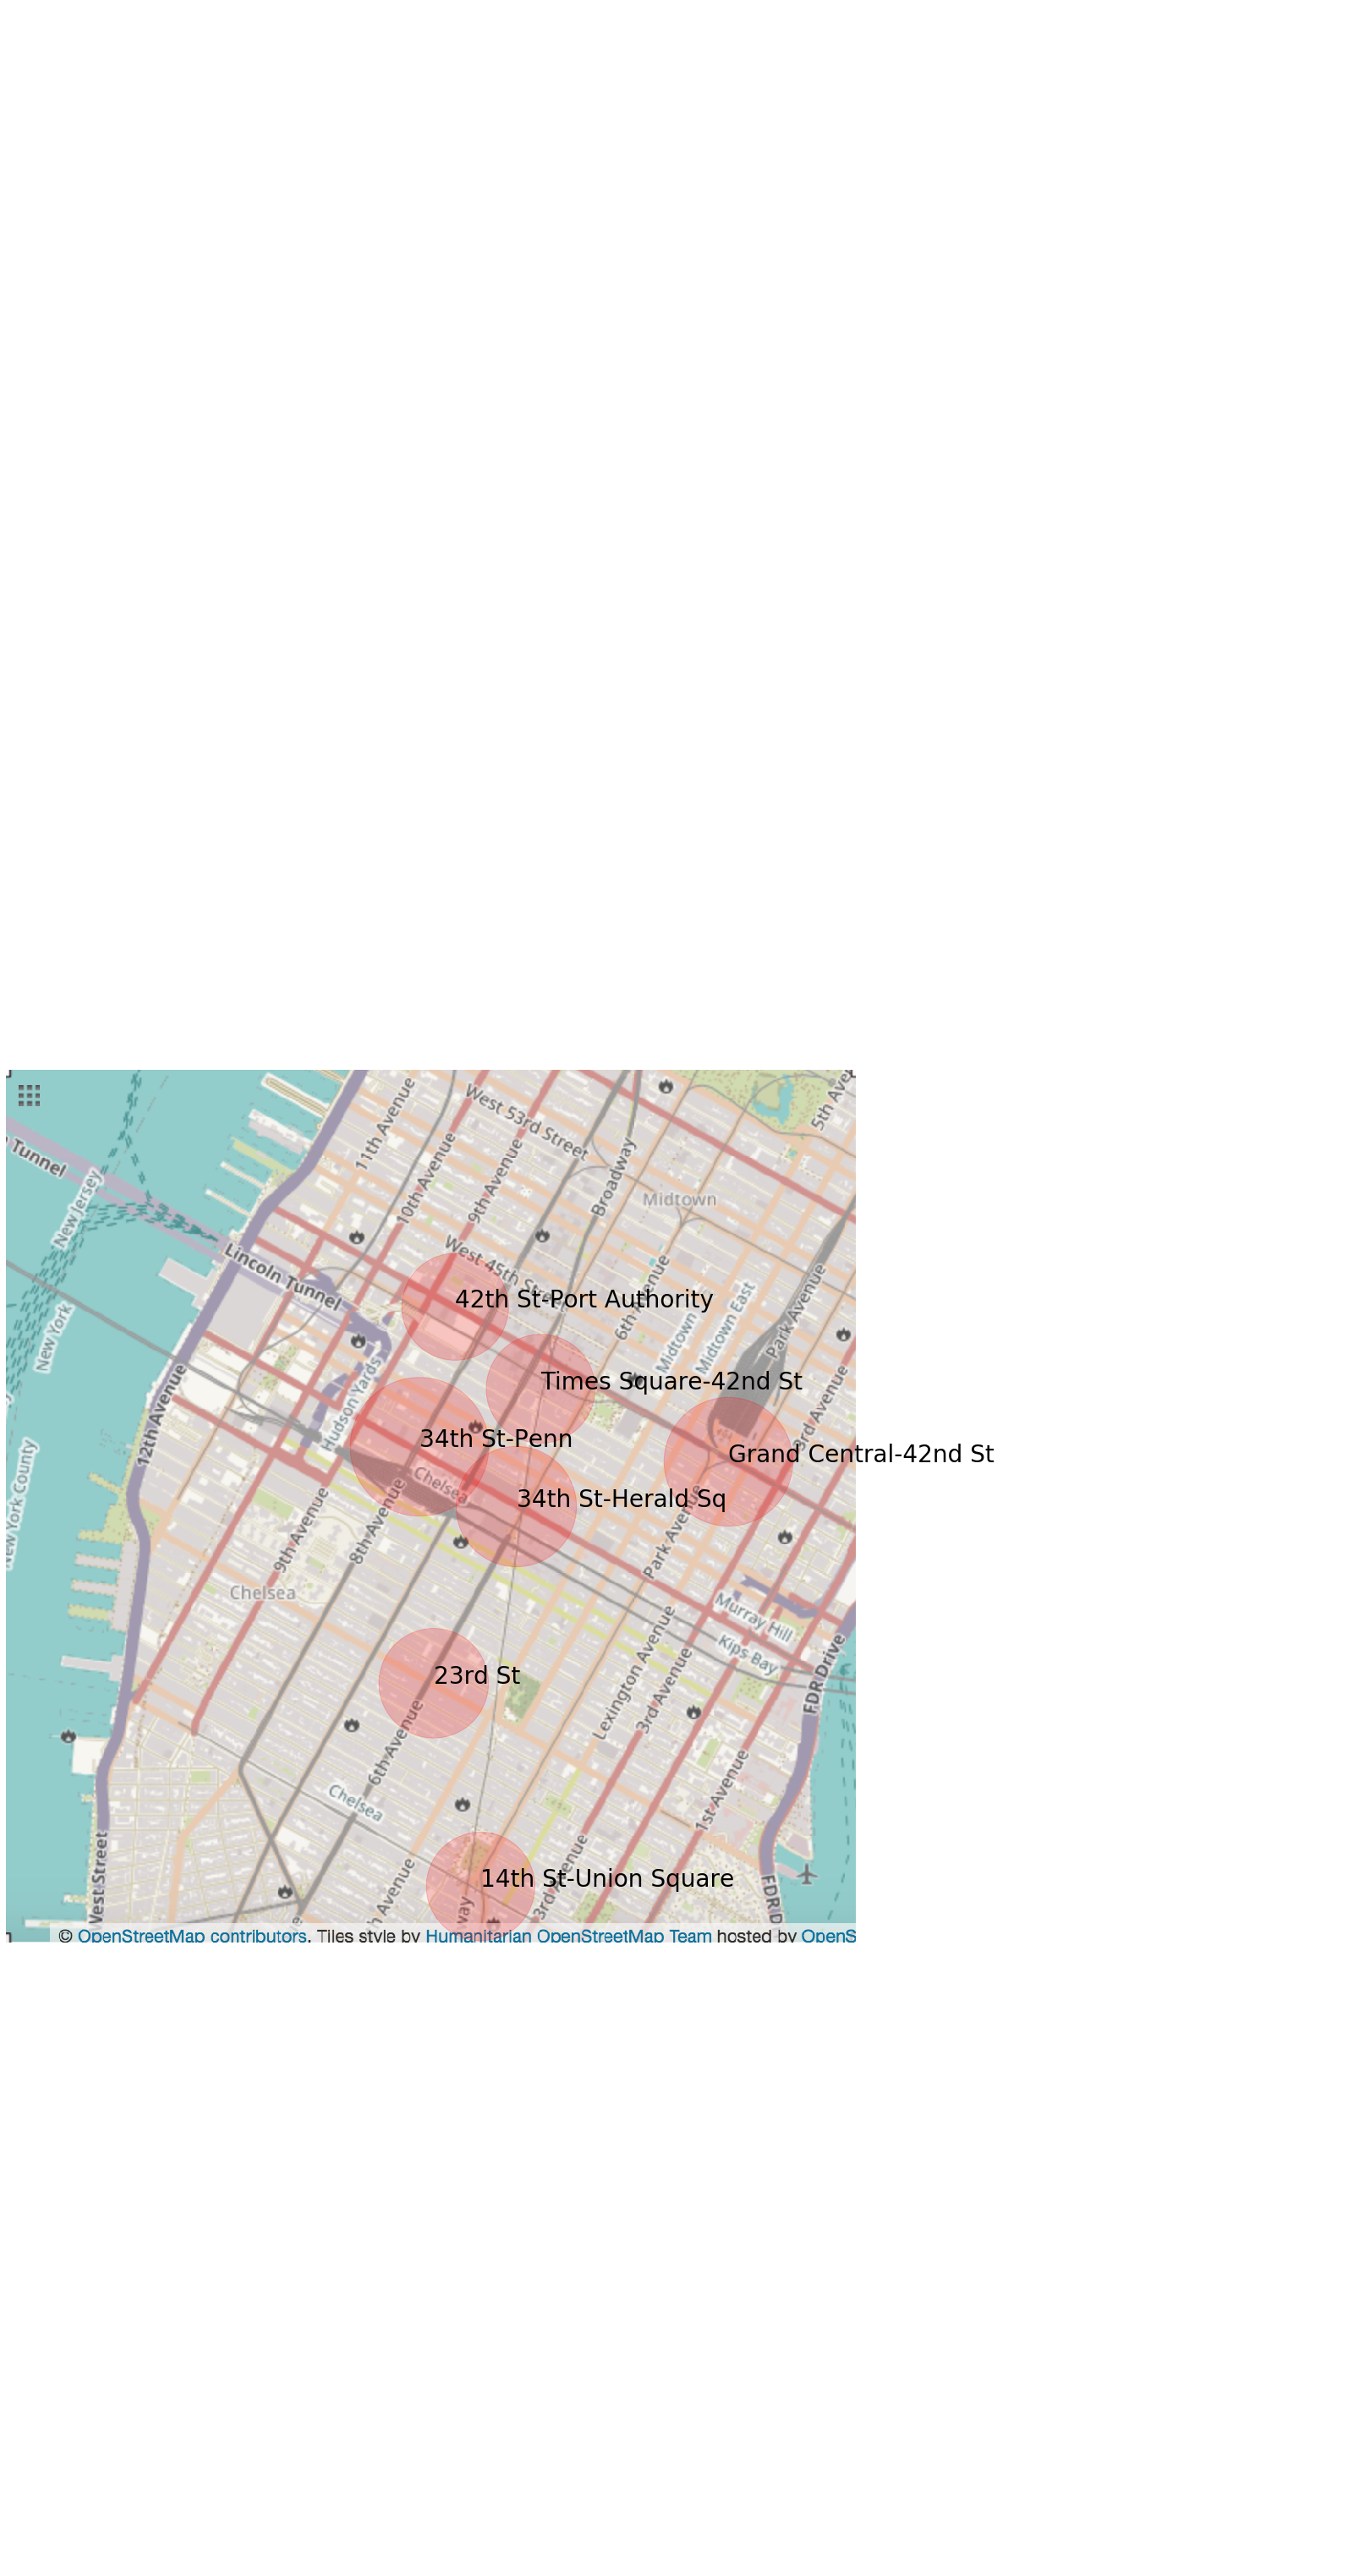

In [78]:
fig, ax = plt.subplots(figsize = (18,19))

ax.scatter(y = Stations.Station_Latitude,x = Stations.Station_Longitude, zorder=1, 
           c = 'red',alpha= 0.2, s=Stations.Station_Flow)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])
ax.set_frame_on(False)
ax.set_yticklabels("")
ax.set_xticklabels("")
ax.tick_params(axis = u'both', which=u'both',length=0)
ax.imshow(ruh_m, zorder=0, extent = Bbox, aspect= 'auto')

for i, txt in enumerate(text):
    ax.annotate(txt, (Stations.Station_Longitude[i], Stations.Station_Latitude[i]),fontsize = 28)

fig.savefig('mapgraph.png',bbox_inches = 'tight')

In [35]:
Stations_name = station_flow_annual.index[:100].tolist()
Stations_size = station_flow_annual[:100]

data = {'Station_Flow':Stations_size}
stations_hundred = pd.DataFrame(data = data).reset_index()

In [82]:
station_dict = {'TIMES SQ-42 ST':'Times Square-42nd St','23 ST':'23rd St','GRD CNTRL-42 ST':'Grand Central-42nd St',
               '14 ST-UNION SQ':'14th St-Union Square','FULTON ST':'Fulton St','86 ST':'86th St','125 ST':'125th St',
               "42 ST-PORT AUTH":"42th St-Port Authority",'34 ST-PENN STA':'34th St-Penn','34 ST-HERALD SQ':'34th St-Herald Sq',
               'CANAL ST':"Canal St","59 ST COLUMBUS":'59th St-Columbus Circle','59 ST':'59th St','14 ST':'14th St',
               '47-50 STS ROCK':'47-50th Sts Rockefeller Center','96 ST':'96th St','FLUSHING-MAIN':'Flushing-Main St',
               'CHAMBERS ST':'Chambers St','72 ST':'72nd St','50 ST':'50th St','JKSN HT-ROOSVLT':'Jackson Heights-Roosevelt Ave',
               'ATL AV-BARCLAY':'Atlantic Av-Barclays Ctr','28 ST':'28th St','LEXINGTON AV/53':'Lexington Av-53rd St',
               'WALL ST':'Wall St','7 AV':'7th Av','145 ST':'145th St','JAY ST-METROTEC':'Jay St - Borough Hall','8 AV':'8th Av',
               'CHURCH AV':'Church Av','JAMAICA CENTER':'Jamaica-179th St','57 ST-7 AV':'57th St','77 ST':'77th St','72 ST-2 AVE':'72nd St',
               'BOROUGH HALL':'Borough Hall','GRAND ST':'Grand St','BOWLING GREEN':'Bowling Green','116 ST':'116th St','B''WAY-LAFAYETTE':'Broadway-Lafayette St',
               'KINGS HWY':'Kings Highway','5 AV/53 ST':'53rd St','103 ST':'103rd St','DELANCEY/ESSEX':'Delancey St','33 ST':'33rd St',
               'KEW GARDENS':'Kew Gardens-Union Turnpike','CROWN HTS-UTICA':'Utica Av','LEXINGTON AV/63':'Lexington Av',
               'DEKALB AV':'DeKalb Av','66 ST-LINCOLN':'66th St-Lincoln Center','51 ST':'51st St','49 ST':'49th St',
               'SUTPHIN-ARCHER':'Sutphin Blvd-Archer Av - JFK','BEDFORD AV':'Bedford Av','181 ST':'181st St','161/YANKEE STAD':'Yankee Stadium-161st St',
               'THIRTY THIRD ST':'33rd St','SPRING ST':'Spring St','34 ST-HUDSON YD':'34th St','FOREST HILLS 71':'Forest Hills-71st Av',
               '68ST-HUNTER CO':'68th St-Hunter College','WOODHAVEN BLVD':'Woodhaven Blvd','JUNCTION BLVD':'Junction Blvd','NOSTRAND AV':'Nostrand Av',
               'CORTLANDT ST':'Cortlandt St','FRANKLIN ST':'Franklin St','1 AV':'1st Av','2 AV':'2nd Av','BROOKLYN BRIDGE':'Brooklyn Bridge-City Hall',
               '103 ST-CORONA':'103rd St','ASTOR PL':'Astor Place','61 ST WOODSIDE':'Woodside Av-61st St','WORLD TRADE CTR':'World Trade Center',
               'PATH NEW WTC':'World Trade Center','96 ST-2 AVE':'96th St','82 ST-JACKSON H':'Jackson Heights-Roosevelt Ave','PARKCHESTER':'Parkchester-East 177th St',
               '79 ST':'79th St','FORDHAM RD':'Fordham Rd','CHRISTOPHER ST':'Christopher St','CATHEDRAL PKWY':'Cathedral Parkway-110th St',
               'MYRTLE-WYCKOFF':'Myrtle-Willoughby Avs','FLATBUSH AV-B.C':'Flatbush Av-Brooklyn College'}

In [83]:
stations_hundred.Station.replace(station_dict,inplace = True)

In [84]:
Station_loca = stations_hundred.merge(location,how='left',left_on = 'Station',right_on = 'Station_Name')

In [89]:
Station_loca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
Station              100 non-null object
Station_Flow         100 non-null float64
Station_Name         100 non-null object
Station_Latitude     100 non-null float64
Station_Longitude    100 non-null float64
dtypes: float64(3), object(2)
memory usage: 9.7+ KB


In [85]:
station_to_fill = ['34th St-Penn','34th St-Herald Sq','42th St-Port Authority','86th St']
lat_2fill = [40.752342 , 40.749936 , 40.757965,40.778025]
lon_2fill = [-73.9932 , -73.988050,-73.991302,-73.951095]

for i in range(len(station_to_fill)):
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Latitude'] = lat_2fill[i]
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Longitude'] = lon_2fill[i]

In [86]:
Station_loca.fillna(0,inplace=True)

In [87]:
columns_to_keep = [ 'Station','Station_Flow','Station_Latitude','Station_Longitude']
Stations2 = pd.DataFrame(Station_loca[columns_to_keep])

Stations2.Station_Flow = Stations2.Station_Flow/1000000*10

In [61]:
text = Stations.Station.tolist()
text = text + ['']*90

In [62]:
len(text)

100

In [96]:
sta_color = [0]*10 +[1]*90
levels = [0,1]
colors = ['tab:red','indigo']

cmap , norm = mpl.colors.from_levels_and_colors(levels = levels, colors = colors, extend = 'max')

In [80]:
Bbox = (-74.0405,   -73.8659,      
         40.6853, 40.7934)
ruh_m2 = plt.imread('./nycmapbig.png')

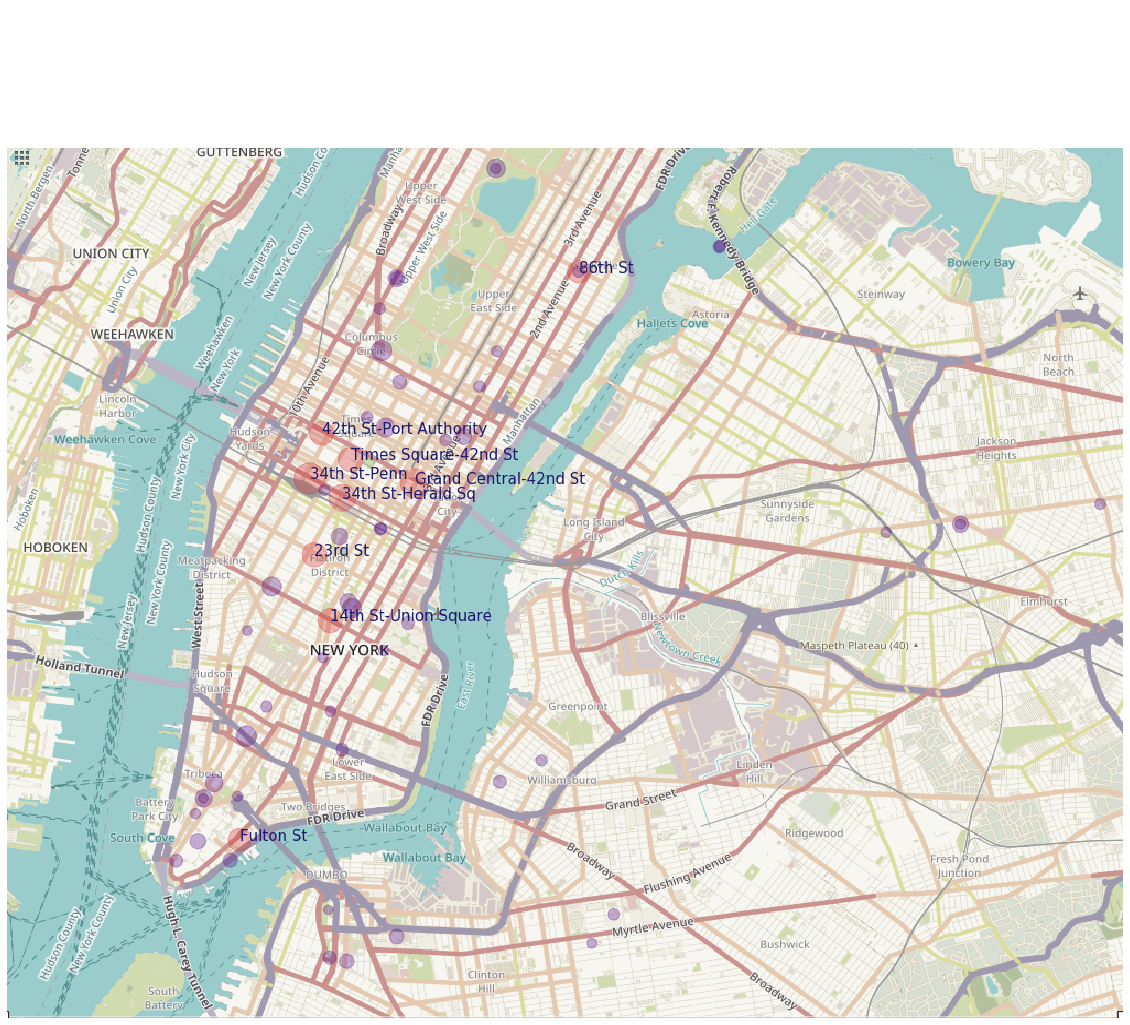

In [102]:
#plot location of top 50 in list
fig, ax = plt.subplots(figsize = (20,16))

ax.scatter(y = Stations2.Station_Latitude,x = Stations2.Station_Longitude, zorder=1, 
           c = sta_color,alpha= 0.3, s=Stations2.Station_Flow,cmap = cmap, norm = norm)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])
ax.set_frame_on(False)
ax.set_yticklabels("")
ax.set_xticklabels("")
ax.tick_params(axis = u'both', which=u'both',length=0)
ax.imshow(ruh_m2, zorder=0, extent = Bbox, aspect= 'auto')

for i, txt in enumerate(text):
    ax.annotate(txt, (Stations2.Station_Longitude[i], Stations2.Station_Latitude[i]),fontsize = 15,family = 'sans serif',
                color= 'midnightblue')

fig.savefig('mapgraph_big.svg',bbox_inches = 'tight')